## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Tamir Vaitzman 9205
# student 2: Eliran Haber   8668
# student 3: Nikita Konev   7557
# student 4: Saar Shimshi   1803

In [2]:
#Features:
#Passenger ID - To identify unique passengers
#PClass - The class passengers travelled in
#Sex - Gender of Passenger
#Age - Age of passenger
#SibSp - Number of siblings or spouse
#Parch - Parent or child
#Ticket - Ticket number
#Fare - Amount paid for the ticket
#Embarked - Point of embarkment

#Target:
#Survived - If they survived or not

## Part 2 - Experiments
You could add as many code cells as needed

In [3]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV as GridS, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
#Train-set loading, and show details on train-set
df_train  = pd.read_csv("titanic_train.csv")
print(df_train)
print(df_train.describe())
print(df_train.info())
print(df_train.shape)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  Survived
0         1    0  54.000000      1      0   78.2667         1         1
1         2    0  45.000000      0      0   13.5000         0         1
2         3    1  20.000000      0      0    9.5000         0         0
3         3    1  36.000000      0      0    7.8958         0         0
4         3    1  22.000000      0      0    8.0500         0         0
..      ...  ...        ...    ...    ...       ...       ...       ...
707       1    1  54.000000      0      0   51.8625         0         0
708       3    1  14.000000      5      2   46.9000         0         0
709       2    0   6.000000      0      1   33.0000         0         1
710       2    1  29.699118      0      0    0.0000         0         0
711       1    0  25.000000      1      2  151.5500         0         0

[712 rows x 8 columns]
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  

In [5]:
print("show 5 first lines on train-set:")
df_train.head() ## show 5 first lines on train-set

show 5 first lines on train-set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [6]:
#Test-set loading, and show details on test-set
df_test  = pd.read_csv("titanic_test.csv")
print(df_test)
print(df_test.describe())
print(df_test.info())
print(df_test.shape)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0         3    1  35.000000      0      0   7.0500         0         0
1         3    1  30.000000      0      0   7.2500         0         0
2         3    1  29.699118      0      0  14.5000         0         0
3         3    0  21.000000      0      0   7.7500         2         0
4         3    1  32.000000      0      0  56.4958         0         1
..      ...  ...        ...    ...    ...      ...       ...       ...
174       3    1  29.000000      0      0   7.7500         2         1
175       3    0  45.000000      0      1  14.4542         1         0
176       2    1  23.000000      0      0  13.0000         0         0
177       3    1  40.000000      1      4  27.9000         0         0
178       3    1  36.000000      1      1  24.1500         0         0

[179 rows x 8 columns]
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  179.000000  179.000000  179.000000  

In [7]:
print("show 5 first lines on test-set:")
df_test.head() ## show 5 first lines on test-set

show 5 first lines on test-set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


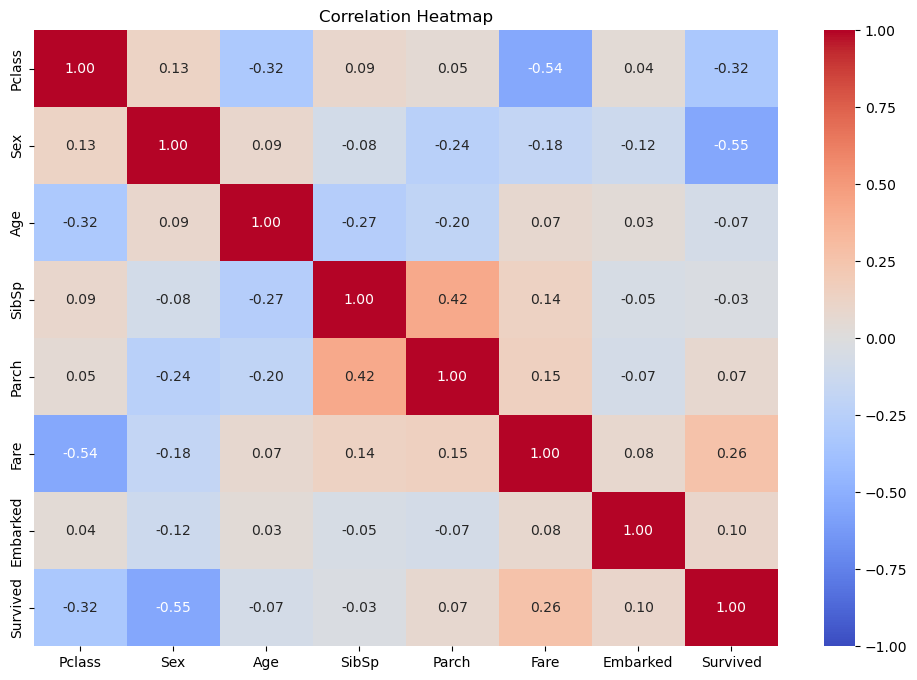

In [8]:
# Calculate the correlation matrix
# Plot the heatmap
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Select features with high correlation to 'Survived'
threshold = 0.2  # based on pearson correlation [-1 < x < 0 < x < 1 ]
important_features = corr_matrix['Survived'][abs(corr_matrix['Survived']) > threshold].sort_values(ascending=True).drop('Survived')

# Display important features with their correlation values
print("Important features with their correlation to 'Survived':")
display(important_features)

# Select these features for the model
X = df_train[important_features.index]
y = df_train['Survived']

Important features with their correlation to 'Survived':


Sex      -0.550699
Pclass   -0.324024
Fare      0.264345
Name: Survived, dtype: float64

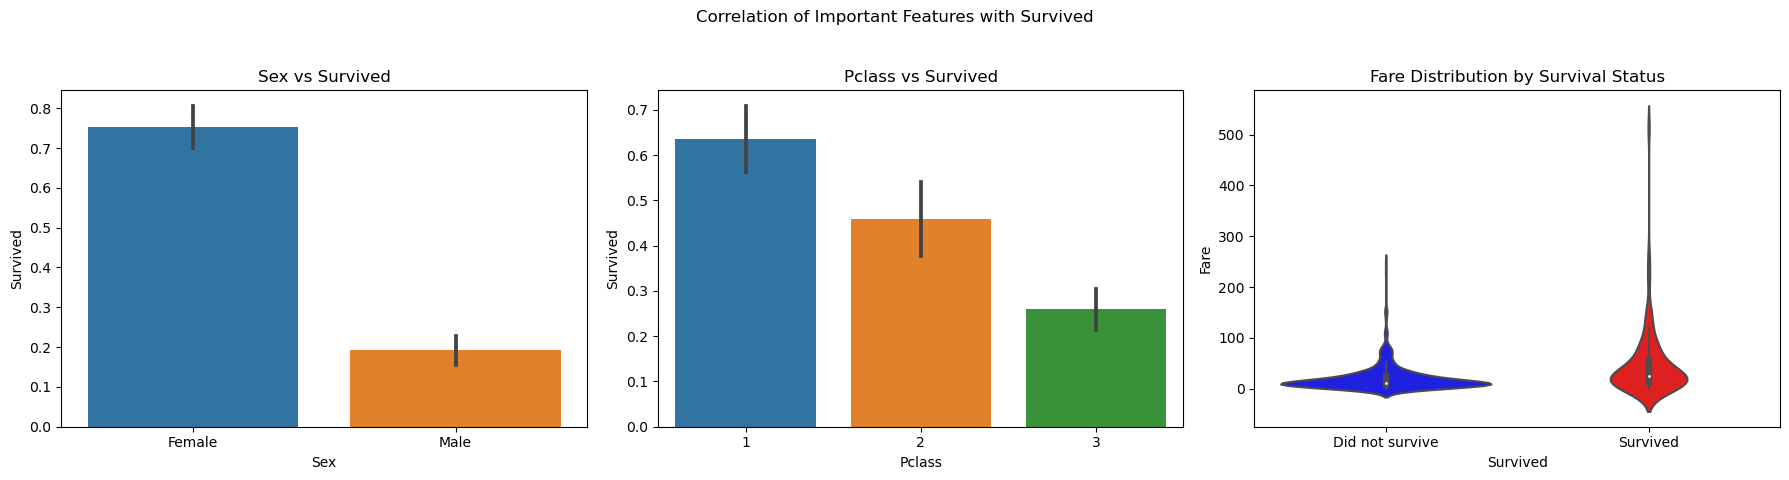

In [11]:
# Visualizing the correlation of the top 3 features ('Sex', 'Pclass', 'Fare') with 'Survived')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Correlation of Important Features with Survived')

# Visualization for 'Sex'
sns.barplot(x='Sex', y='Survived', data=df_train, ax=axes[0])
axes[0].set_title('Sex vs Survived')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Survived')
axes[0].set_xticklabels(['Female', 'Male'])  # Assuming '0' = Male, '1' = Female

# Visualization for 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=axes[1])
axes[1].set_title('Pclass vs Survived')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Survived')

# Visualization for 'Fare'
Violin = sns.violinplot(x="Survived", y="Fare", data=df_train, palette = ["blue", "red"] )
xlabels = ["Did not survive", "Survived"]
Violin.set(xticklabels=xlabels)
axes[2].set_title("Fare Distribution by Survival Status")


# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV as GridS, KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

params = {'KNN__n_neighbors': [3, 5, 7], 'DT__max_depth': [3, 5, 7]}

feature_selection = [('varianceThreshold', VarianceThreshold()), 
                      ('selectKBest', SelectKBest(k='all'))]  # Changed k to 'all'
feature_scaling = [('minMax', MinMaxScaler()), ('standardScaler', StandardScaler())]

# Create separate pipelines for KNN and DecisionTree
pipeline_KNN = Pipeline(feature_selection + feature_scaling + [('KNN', KNN())])
pipeline_DT = Pipeline(feature_selection + feature_scaling + [('DT', DecisionTreeClassifier())])

# Initialize GridSearchCV for each pipeline
folds = KFold(n_splits=5, shuffle=True, random_state=42)
gridSearch_KNN = GridS(pipeline_KNN, {'KNN__n_neighbors': [3, 5, 7]}, scoring='f1_macro', cv=folds)
gridSearch_DT = GridS(pipeline_DT, {'DT__max_depth': [3, 5, 7]}, scoring='f1_macro', cv=folds)

results = []  # To store the results
best_avg_f1_score = 0
best_model_overall = None
best_params_overall = None

for trainIndex, valIndex in folds.split(df_train):
    xTrain, xVal = df_train.iloc[trainIndex, :-1], df_train.iloc[valIndex, :-1]
    yTrain, yVal = df_train.iloc[trainIndex, -1], df_train.iloc[valIndex, -1]
    
    # Fit GridSearchCV for each pipeline
    gridSearch_KNN.fit(xTrain, yTrain)
    gridSearch_DT.fit(xTrain, yTrain)
    
    # Get best models and parameters
    best_model_KNN = gridSearch_KNN.best_estimator_
    best_model_DT = gridSearch_DT.best_estimator_
    
    avg_cv_f1_KNN = gridSearch_KNN.best_score_
    avg_cv_f1_DT = gridSearch_DT.best_score_
    
    # Append results to the results list
    results.append({'Model': 'KNN', 'Parameters': gridSearch_KNN.best_params_, 'F1 Score': avg_cv_f1_KNN})
    results.append({'Model': 'DecisionTree', 'Parameters': gridSearch_DT.best_params_, 'F1 Score': avg_cv_f1_DT})
    
    # Update best model if current one is better
    if avg_cv_f1_KNN > best_avg_f1_score:
        best_avg_f1_score = avg_cv_f1_KNN
        best_model_overall = 'KNN'
        best_params_overall = gridSearch_KNN.best_params_
    if avg_cv_f1_DT > best_avg_f1_score:
        best_avg_f1_score = avg_cv_f1_DT
        best_model_overall = 'DecisionTree'
        best_params_overall = gridSearch_DT.best_params_

# Create a DataFrame from the results and sort it
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df = results_df.reset_index(drop=True)  # Reset index for cleaner display

# Improve the display format
results_df['F1 Score'] = results_df['F1 Score'].round(4)  # Round F1 scores for better readability
results_df['Parameters'] = results_df['Parameters'].apply(lambda x: str(x))  # Convert parameters dict to string

print('Best Model:', best_model_overall)
print('Best Parameters:', best_params_overall)
print('Best Average F1 Score from 5-Fold CV:', best_avg_f1_score)
display(results_df)

Best Model: KNN
Best Parameters: {'KNN__n_neighbors': 5}
Best Average F1 Score from 5-Fold CV: 0.8103049582306026


,Model,Parameters,F1 Score
0,KNN,{'KNN__n_neighbors': 5},0.8103
1,DecisionTree,{'DT__max_depth': 5},0.8000
2,DecisionTree,{'DT__max_depth': 3},0.7920
3,KNN,{'KNN__n_neighbors': 7},0.7912
4,KNN,{'KNN__n_neighbors': 3},0.7891
5,DecisionTree,{'DT__max_depth': 3},0.7817
6,DecisionTree,{'DT__max_depth': 5},0.7784
7,DecisionTree,{'DT__max_depth': 3},0.7729
8,KNN,{'KNN__n_neighbors': 7},0.7685
9,KNN,{'KNN__n_neighbors': 7},0.7505


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [13]:
# Based on the results from the experiments, we'll use the KNN model with n_neighbors=5 and the best pipeline configuration

from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import Pipeline

# Define the final pipeline for the best model
pipeline_best = Pipeline([
    ('varianceThreshold', VarianceThreshold()), 
    ('selectKBest', SelectKBest(k='all')),
    ('minMax', MinMaxScaler()),
    ('KNN', KNN(n_neighbors=5))
])

# Separate the features and target variable from the training set
X = df_train[important_features.index]
y = df_train['Survived']

# Fit the pipeline to the entire training data
pipeline_best.fit(X, y)

print("Best model trained on the entire training set:")
print(pipeline_best)

Best model trained on the entire training set:
Pipeline(steps=[('varianceThreshold', VarianceThreshold()),
                ('selectKBest', SelectKBest(k='all')),
                ('minMax', MinMaxScaler()), ('KNN', KNeighborsClassifier())])


## Part 4 - Apply on test and show model performance estimation

In [13]:
# Apply feature engineering on the test and predict the test examples
# Ensure to use the same pipeline as for the train set

# Separate the features from the test set
X_test = df_test[important_features.index]
y_test = df_test['Survived']

# Predict the test set
y_pred = pipeline_best.predict(X_test)

# Evaluate quality of the model
from sklearn.metrics import classification_report, accuracy_score

# Calculate the accuracy and get the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Show the first couple of predictions of the test set
first_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(5)
display(first_predictions)

Model Accuracy: 0.8324

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       118
           1       0.77      0.72      0.75        61

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
